# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.10.0


## Creating some data to view and fit

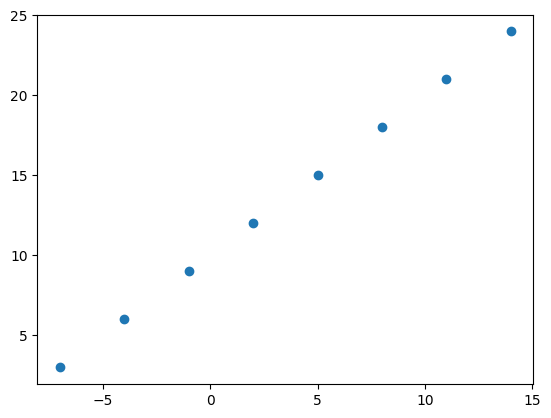

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [3]:
# Relationship that have to learn our neural network
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes

In [4]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700])>)

In [5]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [6]:
# Turn our NumPy arrays into tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells out model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performances of our model).
3. **Fitting a model** - letting the model try to find patterns between X and y (features and labels).

In [8]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 953ms/step - loss: 11.8820 - mae: 11.8820
Epoch 2/5
1/1 [==============================] - 0s 4ms/step - loss: 11.7495 - mae: 11.7495
Epoch 3/5
1/1 [==============================] - 0s 3ms/step - loss: 11.6170 - mae: 11.6170
Epoch 4/5
1/1 [==============================] - 0s 4ms/step - loss: 11.4845 - mae: 11.4845
Epoch 5/5
1/1 [==============================] - 0s 3ms/step - loss: 11.3520 - mae: 11.3520


In [9]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [10]:
# Try and make a prediction using our model
y_pred = model.predict([17])
y_pred

1/1 [==============================] - 0s 70ms/step


array([[10.883723]], dtype=float32)

## Improve our model

We can improve our model by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from).

In [11]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 182ms/step - loss: 17.0789 - mae: 17.0789
Epoch 2/100
1/1 [==============================] - 0s 2ms/step - loss: 16.7976 - mae: 16.7976
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 16.5164 - mae: 16.5164
Epoch 4/100
1/1 [==============================] - 0s 2ms/step - loss: 16.2351 - mae: 16.2351
Epoch 5/100
1/1 [==============================] - 0s 2ms/step - loss: 15.9539 - mae: 15.9539
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 15.6726 - mae: 15.6726
Epoch 7/100
1/1 [==============================] - 0s 3ms/step - loss: 15.3914 - mae: 15.3914
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 15.1101 - mae: 15.1101
Epoch 9/100
1/1 [==============================] - 0s 3ms/step - loss: 14.8559 - mae: 14.8559
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 14.7234 - mae: 14.7234
Epoch 11/100
1/1 [==============================] - 0s 3m

In [12]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [13]:
# Let's see if our model prediction has improved...
model.predict([17])

1/1 [==============================] - 0s 140ms/step


array([[29.722687]], dtype=float32)

In [14]:
# Let's see if we can make another to improve our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae", 
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 256ms/step - loss: 14.2876 - mae: 14.2876
Epoch 2/100
1/1 [==============================] - 0s 4ms/step - loss: 13.6237 - mae: 13.6237
Epoch 3/100
1/1 [==============================] - 0s 4ms/step - loss: 12.9701 - mae: 12.9701
Epoch 4/100
1/1 [==============================] - 0s 4ms/step - loss: 12.3255 - mae: 12.3255
Epoch 5/100
1/1 [==============================] - 0s 3ms/step - loss: 11.6875 - mae: 11.6875
Epoch 6/100
1/1 [==============================] - 0s 3ms/step - loss: 11.0541 - mae: 11.0541
Epoch 7/100
1/1 [==============================] - 0s 5ms/step - loss: 10.4222 - mae: 10.4222
Epoch 8/100
1/1 [==============================] - 0s 3ms/step - loss: 9.7895 - mae: 9.7895
Epoch 9/100
1/1 [==============================] - 0s 4ms/step - loss: 9.1532 - mae: 9.1532
Epoch 10/100
1/1 [==============================] - 0s 3ms/step - loss: 8.5103 - mae: 8.5103
Epoch 11/100
1/1 [==============================] - 0s 3ms/step

In [15]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 48ms/step


array([[26.16755]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```

Build a model -> fit it -> evaluate it -> tweak a model -> repeat it

When it comes to evaluation... there are 3 words you should memorize:

> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model looke like?
* The training of the model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [16]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [17]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

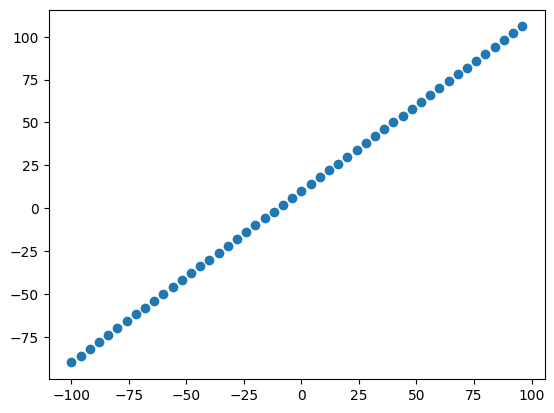

In [18]:
# Visualize the data
plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what is learned, this set is typically 10-15% of the total data available.

In [19]:
# Check the length of how many samples we have
len(X)

50

In [20]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we have got our data in training and test sets... let's visualize it again!

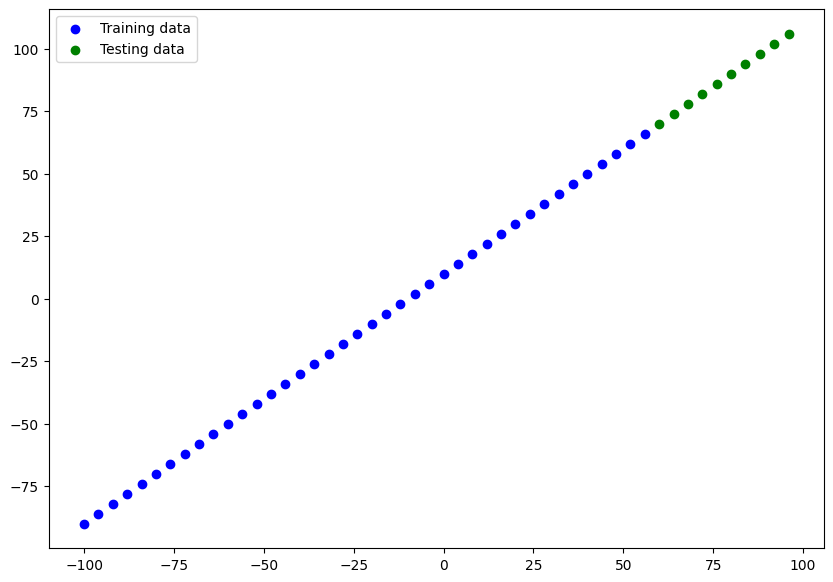

In [21]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="blue", label="Training data")
# Plot test set in green
plt.scatter(X_test, y_test, c="green", label="Testing data")
# Show a legend
plt.legend()
plt.show()

In [22]:
# Let's have a look at how to build a neural network for our data

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, 
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
# model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

In [23]:
# model.summary() --> This will raise an error because of there isn not input_shape

### Visualizing the model

In [31]:
# Let's create a model which builds automatically by defining the input_shape argument in the first layer
tf.random.set_seed(42)

# Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"), # input_shape represents the number of variables/columns
    tf.keras.layers.Dense(1, name="output_layer")
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [32]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable params - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters are not updated during training (this is typically when you bring parameters from other models during **transfer learning**)

In [33]:
# Let's fit our model to the training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

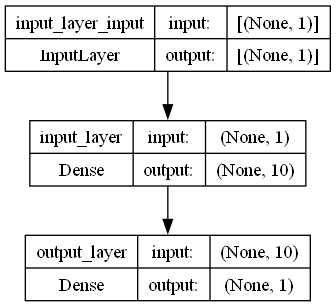

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 46ms/step


array([[ 70.4553 ],
       [ 75.03813],
       [ 79.62095],
       [ 84.20378],
       [ 88.78662],
       [ 93.36944],
       [ 97.95226],
       [102.5351 ],
       [107.11792],
       [111.70076]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [37]:
# Let's create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth
    """
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's predictions in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # Show the legend
    plt.legend();


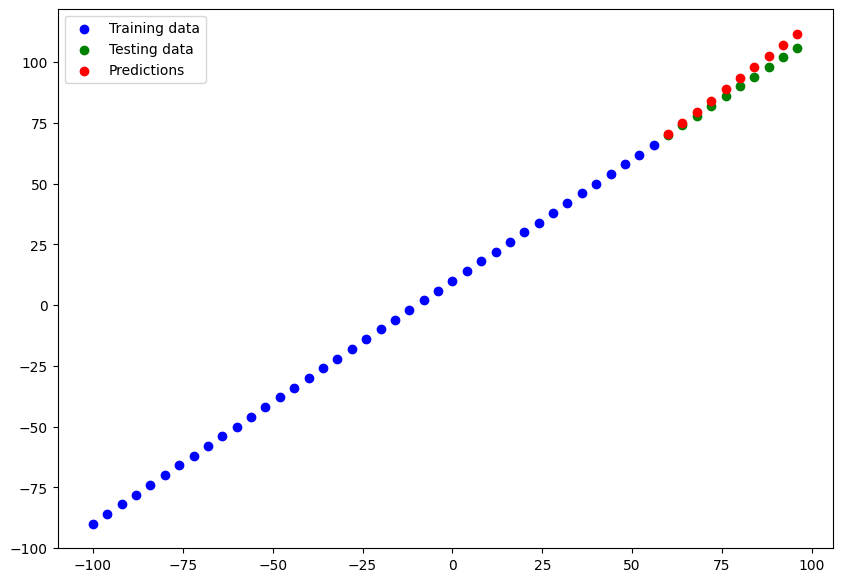

In [38]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error
* MSE - mean square error

In [39]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 134ms/step - loss: 3.0780 - mae: 3.0780


[3.078026533126831, 3.078026533126831]

In [51]:
y_pred

array([[ 70.4553 ],
       [ 75.03813],
       [ 79.62095],
       [ 84.20378],
       [ 88.78662],
       [ 93.36944],
       [ 97.95226],
       [102.5351 ],
       [107.11792],
       [111.70076]], dtype=float32)

In [50]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [53]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=3.0780265>

In [56]:
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=12.276682>

In [ ]:
# Make somre functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true, y_pred)

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true, y_pred)